In [1]:
import numpy
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as scikit_learn

In [2]:
df_ludnosc = pd.read_csv("../data/ludnosc.csv", sep=";")
df_gminy = pd.read_csv("../data/gminy.csv", sep=";")

/Users/gsochaj/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_ludnosc.head()

,Kategoria,Kod,Nazwa,Zmienna,Rok,Wartosc,Jednostka miary,Atrybut,Unnamed: 8
0,Gospodarstwa,0,POLSKA,gospodarstwa domowe objęte badaniem,1999,31428,gosp.,NaN,NaN
1,Gospodarstwa,0,POLSKA,gospodarstwa domowe objęte badaniem,2000,36163,gosp.,NaN,NaN
2,Gospodarstwa,0,POLSKA,gospodarstwa domowe objęte badaniem,2001,31847,gosp.,NaN,NaN
3,Gospodarstwa,0,POLSKA,gospodarstwa domowe objęte badaniem,2002,32342,gosp.,NaN,NaN
4,Gospodarstwa,0,POLSKA,gospodarstwa domowe objęte badaniem,2003,32452,gosp.,NaN,NaN


In [4]:
df_gminy.head()

,Kategoria,Kod,Nazwa,Zmienna,Rok,Wartosc,Jednostka miary,Atrybut,Unnamed: 8
0,Ludność,0,POLSKA,ludność na 1 km2,2002,122.0,osoba,NaN,NaN
1,Ludność,0,POLSKA,ludność na 1 km2,2003,122.0,osoba,NaN,NaN
2,Ludność,0,POLSKA,ludność na 1 km2,2004,122.0,osoba,NaN,NaN
3,Ludność,0,POLSKA,ludność na 1 km2,2005,122.0,osoba,NaN,NaN
4,Ludność,0,POLSKA,ludność na 1 km2,2006,122.0,osoba,NaN,NaN


In [5]:
for col in df_ludnosc.columns:
    print(f'{col} - {df_ludnosc[col].unique()}\n')

Kategoria - ['Gospodarstwa' 'Osoby' 'Wyposażenie' 'Artykuły' 'Dochody' 'Wydatki']

Kod - [      0  200000  400000  600000  800000 1000000 1200000 1400000 1600000
 1800000 2000000 2200000 2400000 2600000 2800000 3000000 3200000]

Nazwa - ['POLSKA' 'DOLNOŚLĄSKIE' 'KUJAWSKO-POMORSKIE' 'LUBELSKIE' 'LUBUSKIE'
 'ŁÓDZKIE' 'MAŁOPOLSKIE' 'MAZOWIECKIE' 'OPOLSKIE' 'PODKARPACKIE'
 'PODLASKIE' 'POMORSKIE' 'ŚLĄSKIE' 'ŚWIĘTOKRZYSKIE' 'WARMIŃSKO-MAZURSKIE'
 'WIELKOPOLSKIE' 'ZACHODNIOPOMORSKIE']

Zmienna - ['gospodarstwa domowe objęte badaniem' 'ogółem' 'pracujących'
 'pobierający świadczenia społeczne' 'emerytury i renty'
 'pozostających na utrzymaniu'
 'przeciętna liczba osób pobierających  świadczenia społeczne w relacji do przeciętnej liczby osób w gospodarstwie domowym'
 'chłodziarka' 'automat pralniczy' 'zmywarka do naczyń'
 'kuchenka mikrofalowa'
 'kuchenka elektryczna z płytą ceramiczną, indukcyjną' 'samochód osobowy'
 'odtwarzacz płyt kompaktowych'
 'zestaw do odbioru, rejestracji i odtwarzani

In [6]:
for col in df_gminy.columns:
    print(f'{col} - {df_gminy[col].unique()}\n')

Kategoria - ['Ludność' 'Ludność wg grup wieku' 'Mężczyźni wg grup wieku'
 'Kobiety wg grup wieku' 'Bezrobocie' 'Skolaryzacja' 'Dochody per capita'
 'Wydatki per capita']

Kod - [      0  200000  201000 ... 1431001 1431141 1431981]

Nazwa - ['POLSKA' 'DOLNOŚLĄSKIE' 'Powiat bolesławiecki' ...
 'M.st.Warszawa do 2001 (1)' 'Warszawa - Ursus do 2001 (1)'
 'Związek gmin dzielnic Warszawy do 2001 (1)']

Zmienna - ['ludność na 1 km2' 'ogółem' '0-14' '15-64' '65 i więcej'
 'urodzenia żywe na 1000 ludności' 'zgony na 1000 ludności'
 'przyrost naturalny na 1000 ludności' 'mężczyźni' 'kobiety'
 'szkoły podstawowe' 'gimnazja' 'w Dziale 801- Oświata i wychowanie'
 'w Dziale 921 - Kultura i ochrona dziedzictwa narodowego'
 'wydatki w rozdziale 90005 Ochrona powietrza atmosferycznego i klimatu'
 'wydatki majątkowe']

Rok - [2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020 2001]

Wartosc - [122.0 123.0 146.0 ... '120,84' '5256' '9089']

Jednostka miary - [

In [7]:
# TERYT kod - jeżeli id kończy się na 1,2 to jest to gmina zwykła bez podziału. Jeżeli kończy się na 3 to gmina dzieli się jeszcze na terytorium miejskie i wiejskie ale nas to w sumie nie obchodzi hehe
# TERYT kod - jeżeli kończy się na 0 to jest to województwo, powiat lub Polska cała
# TERYT kod - jeżeli kończy się na 4,5 to wtedy 4 - terytorium miejskie oraz 5 - terytorium wiejskie

df_only_gminy = df_gminy[df_gminy['Kod'].apply(str).str.endswith(tuple('123'))]
df_only_gminy.reset_index(inplace=True,drop=True)
df_only_gminy.head(5)

,Kategoria,Kod,Nazwa,Zmienna,Rok,Wartosc,Jednostka miary,Atrybut,Unnamed: 8
0,Ludność,201011,Bolesławiec (1),ludność na 1 km2,2002,1814.0,osoba,NaN,NaN
1,Ludność,201011,Bolesławiec (1),ludność na 1 km2,2003,1809.0,osoba,NaN,NaN
2,Ludność,201011,Bolesławiec (1),ludność na 1 km2,2004,1803.0,osoba,NaN,NaN
3,Ludność,201011,Bolesławiec (1),ludność na 1 km2,2005,1797.0,osoba,NaN,NaN
4,Ludność,201011,Bolesławiec (1),ludność na 1 km2,2006,1726.0,osoba,NaN,NaN


In [8]:
# Wartosci do float'a

df_only_gminy['Wartosc'] = df_only_gminy['Wartosc'].apply(str).str.replace(',','.').apply(float)

# Zrobienie pivota aby wyciągnąć rok jako kolumny i wartość jako dane

df_only_gminy_pivot = df_only_gminy.pivot_table(columns='Rok', index=['Kod','Nazwa','Kategoria','Zmienna','Jednostka miary'],values='Wartosc')
df_only_gminy_pivot.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Rok                                                                     2001  \
Kod    Nazwa           Kategoria             Zmienna   Jednostka miary         
201011 Bolesławiec (1) Bezrobocie            kobiety   %                 NaN   
                                             mężczyźni %                 NaN   
                                             ogółem    %                 NaN   
                       Dochody per capita    ogółem    zł                NaN   
                       Kobiety wg grup wieku 0-14      osoba             NaN   

Rok                                                                       2002  \
Kod    Nazwa           Kategoria             Zmienna   Jednostka miary           
201011 Bolesławiec (1) Bezrobocie            kobiety   %                   NaN   
                                             mężczyźni %                   NaN   
                                             ogółem    %                   NaN   
                       Dochody per capita    ogółem    zł               1450.0   
                       Kobiety wg grup wieku 0-14      osoba               NaN   

Rok                                                                       2003  \
Kod    Nazwa           Kategoria             Zmienna   Jednostka miary           
201011 Bolesławiec (1) Bezrobocie            kobiety   %                  13.2   
                                             mężczyźni %                  14.7   
                                             ogółem    %                  13.9   
                       Dochody per capita    ogółem    zł               1668.0   
                       Kobiety wg grup wieku 0-14      osoba               NaN   

Rok                                                                       2004  \
Kod    Nazwa           Kategoria             Zmienna   Jednostka miary           
201011 Bolesławiec (1) Bezrobocie            kobiety   %                  11.9   
                                             mężczyźni %                  12.6   
                                             ogółem    %                  12.2   
                       Dochody per capita    ogółem    zł               1577.0   
                       Kobiety wg grup wieku 0-14      osoba               NaN   

Rok                                                                       2005  \
Kod    Nazwa           Kategoria             Zmienna   Jednostka miary           
201011 Bolesławiec (1) Bezrobocie            kobiety   %                  10.3   
                                             mężczyźni %                  10.8   
                                             ogółem    %                  10.6   
                       Dochody per capita    ogółem    zł               1940.0   
                       Kobiety wg grup wieku 0-14      osoba               NaN   

Rok                                                                        2006  \
Kod    Nazwa           Kategoria             Zmienna   Jednostka miary            
201011 Bolesławiec (1) Bezrobocie            kobiety   %                   8.10   
                                             mężczyźni %                   7.50   
                                             ogółem    %                   7.80   
                       Dochody per capita    ogółem    zł               2324.54   
                       Kobiety wg grup wieku 0-14      osoba                NaN   

Rok                                                                        2007  \
Kod    Nazwa           Kategoria             Zmienna   Jednostka miary            
201011 Bolesławiec (1) Bezrobocie            kobiety   %                   6.40   
                                             mężczyźni %                   6.30   
                                             ogółem    %                   6.30   
                       Dochody per capita    ogółem    zł               2724.36   
                       Kobiety wg grup wieku 0-14      osob

In [9]:
# Problematyczne operowanie po wieloindeksowej tabeli
print(df_only_gminy_pivot.first_valid_index())

# Rozwiązanie problemu poprzez spłaszczenie pivotu do dataframe'u

df_only_gminy_piv_flatten = pd.DataFrame(df_only_gminy_pivot.to_records())
df_only_gminy_piv_flatten.head(20)

(201011, 'Bolesławiec (1)', 'Bezrobocie', 'kobiety', '%')


,Kod,Nazwa,Kategoria,Zmienna,Jednostka miary,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,201011,Bolesławiec (1),Bezrobocie,kobiety,%,NaN,NaN,13.20,11.90,10.30,...,7.30,7.60,7.40,5.20,4.40,3.40,2.70,2.70,2.70,4.00
1,201011,Bolesławiec (1),Bezrobocie,mężczyźni,%,NaN,NaN,14.70,12.60,10.80,...,6.00,7.20,6.40,4.50,4.00,3.00,2.20,1.80,2.00,3.00
2,201011,Bolesławiec (1),Bezrobocie,ogółem,%,NaN,NaN,13.90,12.20,10.60,...,6.60,7.40,6.90,4.80,4.10,3.20,2.40,2.20,2.30,3.50
3,201011,Bolesławiec (1),Dochody per capita,ogółem,zł,NaN,1450.00,1668.00,1577.00,1940.00,...,3291.10,2989.65,3278.21,3678.17,3653.29,3905.44,4213.61,4597.48,4900.69,5199.18
4,201011,Bolesławiec (1),Kobiety wg grup wieku,0-14,osoba,NaN,NaN,NaN,NaN,NaN,...,2524.00,2536.00,2489.00,2532.00,2561.00,2564.00,2558.00,2579.00,2589.00,2526.00
5,201011,Bolesławiec (1),Kobiety wg grup wieku,15-64,osoba,NaN,NaN,NaN,NaN,NaN,...,14686.00,14345.00,14102.00,13826.00,13600.00,13293.00,13008.00,12776.00,12632.00,12326.00
6,201011,Bolesławiec (1),Kobiety wg grup wieku,65 i więcej,osoba,NaN,NaN,3367.00,3455.00,3567.00,...,3924.00,4111.00,4275.00,4466.00,4669.00,4874.00,5086.00,5238.00,5350.00,5506.00
7,201011,Bolesławiec (1),Kobiety wg grup wieku,ogółem,osoba,NaN,NaN,21806.00,21781.00,21734.00,...,21134.00,20992.00,20866.00,20824.00,20830.00,20731.00,20652.00,20593.00,20571.00,20358.00
8,201011,Bolesławiec (1),Ludność,ludność na 1 km2,osoba,NaN,1814.00,1809.00,1803.00,1797.00,...,1702.00,1691.00,1680.00,1674.00,1670.00,1662.00,1658.00,1652.00,1649.00,1633.00
9,201011,Bolesławiec (1),Ludność,przyrost naturalny na 1000 ludności,-,NaN,-0.93,-0.12,-0.34,-0.89,...,-0.10,-2.95,-2.79,-2.61,-3.02,-2.75,-2.84,-3.25,-4.38,-5.91


In [10]:
# NaN wartości
nan_2020 = len(df_only_gminy_piv_flatten[df_only_gminy_piv_flatten['2020'].isna()])
all_val = len(df_only_gminy_piv_flatten)
print(f"Na 2020 rok jest {nan_2020} NaN'ów z {all_val} wartości \nStanowi to {round(nan_2020/all_val*100,2)}% całości")

Na 2020 rok jest 4210 NaN'ów z 68612 wartości 
Stanowi to 6.14% całości


In [11]:
# Preprocessing ludnosc.csv. Podział na województwa, przedstawienie ich statystyk itd.

# Ujednolicenie wartości
df_ludnosc['Wartosc'] = df_ludnosc['Wartosc'].apply(str).str.replace(',','.').apply(float)

# Pivot z dataframe'u
df_ludnosc_pivot = df_ludnosc.pivot_table(columns='Rok', index=['Kod','Nazwa','Kategoria','Zmienna','Jednostka miary'],values='Wartosc')

# Spłaszczenie pivot table
df_ludnosc_pivot_flatten = pd.DataFrame(df_ludnosc_pivot.to_records())
df_ludnosc_pivot_flatten.head(20)

,Kod,Nazwa,Kategoria,Zmienna,Jednostka miary,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0,POLSKA,Artykuły,cukier,kg,NaN,NaN,NaN,NaN,NaN,...,1.18,1.20,1.17,1.19,1.09,1.01,0.93,0.94,0.80,0.84
1,0,POLSKA,Artykuły,jaja,szt.,NaN,NaN,NaN,NaN,NaN,...,12.54,12.50,12.17,12.02,11.76,11.64,11.42,11.09,10.99,11.04
2,0,POLSKA,Artykuły,jogurty,kg,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.51,0.50,0.50,0.53,0.52,0.52,0.54,0.57
3,0,POLSKA,Artykuły,jogurty i napoje mleczne,kg,NaN,NaN,NaN,NaN,NaN,...,0.82,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,POLSKA,Artykuły,mięso,kg,NaN,NaN,NaN,NaN,NaN,...,5.48,5.42,5.26,5.29,5.27,5.32,5.28,5.20,5.08,5.09
5,0,POLSKA,Artykuły,mięso surowe,kg,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.96,3.00,3.02,3.04,3.00,2.96,2.87,2.90
6,0,POLSKA,Artykuły,mięso surowe drobiowe,kg,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.51,1.53,1.53,1.57,1.56,1.53,1.53,1.55
7,0,POLSKA,Artykuły,"mleko (bez zagęszczonego i w proszku), napoje ...",l,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,POLSKA,Artykuły,mleko świeże,l,NaN,NaN,NaN,NaN,NaN,...,3.42,3.41,3.35,3.26,3.15,3.08,2.99,2.94,2.87,3.06
9,0,POLSKA,Artykuły,oleje i tłuszcze,kg,NaN,NaN,NaN,NaN,NaN,...,1.31,1.31,1.23,1.21,1.15,1.13,1.11,1.07,1.05,1.08


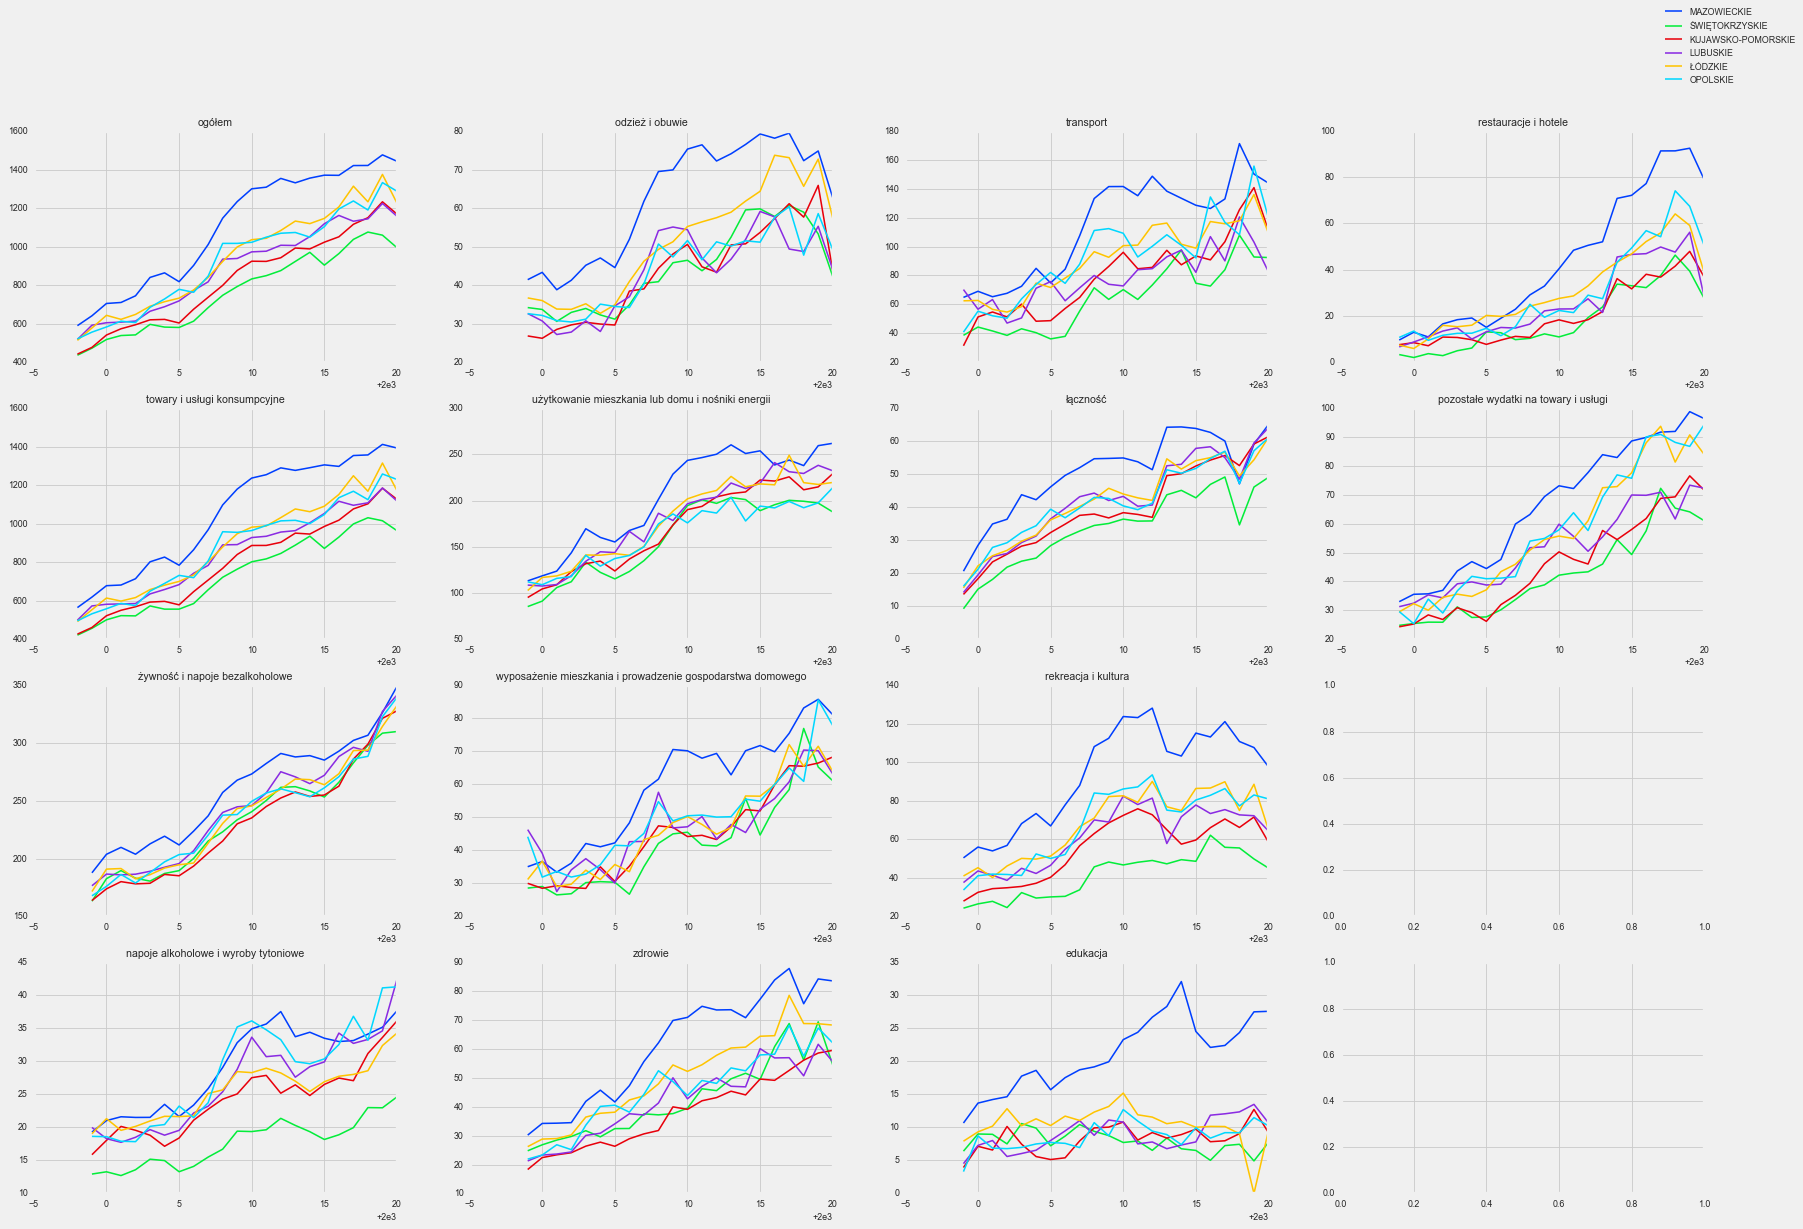

In [23]:
import matplotlib.pyplot as plt


df_ludnosc_work = df_ludnosc[(df_ludnosc['Kategoria']=='Wydatki') & (df_ludnosc['Zmienna']  != 'ogółem (BAEL)') & (df_ludnosc['Zmienna']  != 'towary i usługi konsumpcyjne (BAEL)') & (df_ludnosc['Zmienna']  != 'udział wydatków na żywność i napoje bezalkoholowe w wydatkach ogółem') & (df_ludnosc['Zmienna']  != 'udział wydatków na użytkowanie mieszkania i nośniki energii w wydatkach ogółem') & (df_ludnosc['Nazwa']  != 'POLSKA')]
# pomorski, kujawpomor, warmazur, mazowieckie, lodzkie, dolnos
# wojew = ['POMORSKIE','KUJAWSKO-POMORSKIE','WARMIŃSKO-MAZURSKIE','MAZOWIECKIE','ŁÓDZKIE','DOLNOŚLĄSKIE']
# wojew = df_ludnosc_work['Nazwa'].unique()
wojew = ['MAZOWIECKIE','ŚWIĘTOKRZYSKIE','KUJAWSKO-POMORSKIE','LUBUSKIE','ŁÓDZKIE','OPOLSKIE']

# df_ludnosc_work = df_ludnosc_work[df_ludnosc_work.Nazwa.isin(wojew)]
df_ludnosc_work.reset_index(inplace=True,drop=True)

plt.style.use('seaborn-paper')
fig, axs = plt.subplots(4,4)
fig.set_size_inches(24,16)

idx = 0
idy = 0
for zmienna in df_ludnosc_work['Zmienna'].unique():
    zmienna_df = df_ludnosc_work[df_ludnosc_work['Zmienna']==zmienna]
    for woj in wojew:
        wojew_df = zmienna_df[zmienna_df['Nazwa']==woj]
        axs[idx,idy].plot(wojew_df['Rok'],wojew_df['Wartosc'])
        axs[idx,idy].title.set_text(f'{zmienna}')
        # l1,l2 = axs[idx,idy].plot(wojew_df['Rok'],wojew_df['Wartosc'])
    idx += 1
    if idx == 4:
        idy +=1
        idx = 0
    else:
        pass
fig.legend(wojew)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


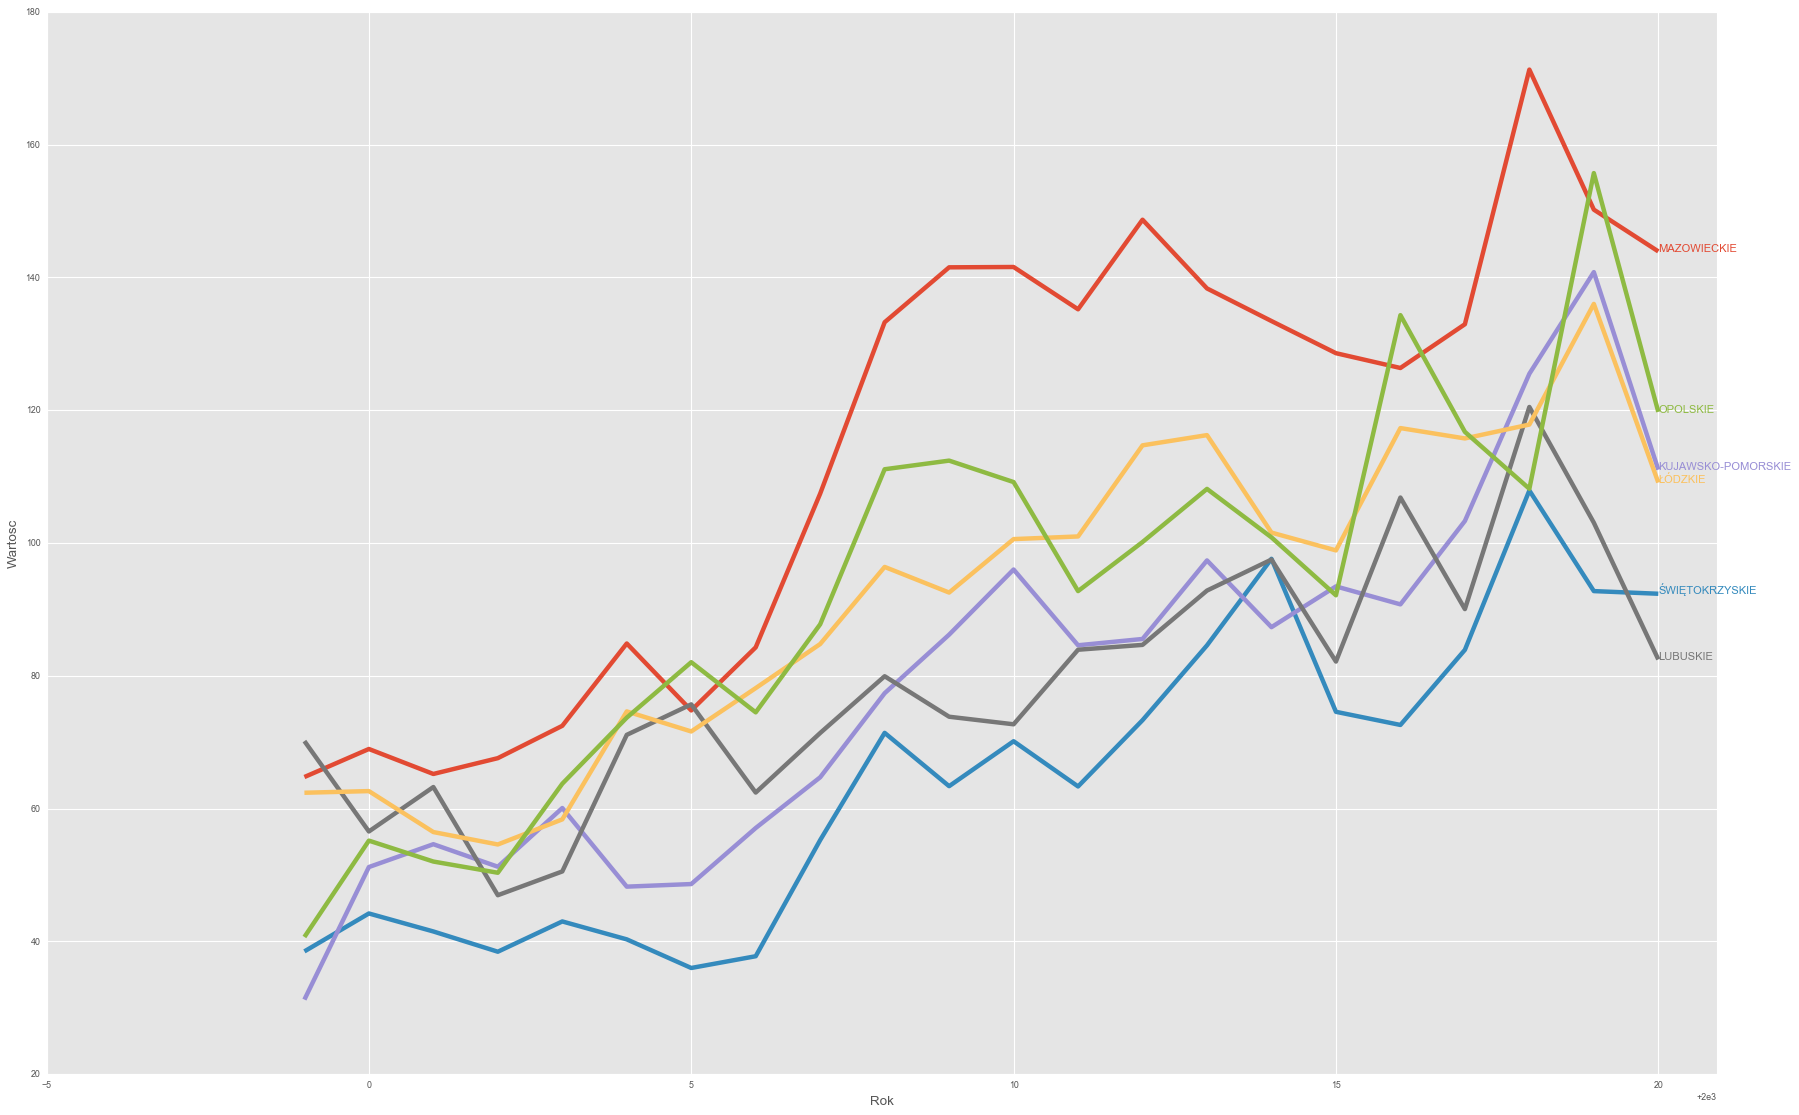

In [32]:
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
# plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
fig.set_size_inches(24,16)

test = df_ludnosc_work[df_ludnosc_work['Zmienna'] == 'transport']
for woj in wojew:
    wojew_df = test[test['Nazwa']==woj]
    # plt.plot(wojew_df['Rok'],wojew_df['Wartosc'],label=woj)
    # plt.annotate(f'{woj}',(wojew_df['Rok'][0],wojew_df['Wartosc'][0]))
    sns.lineplot(ax=ax, data=wojew_df,x='Rok', y='Wartosc')

for line, name in zip(ax.lines, wojew):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float('nan'))
    if not np.isfinite(y) or not np.isfinite(x):
        continue
    text = ax.annotate(name, xy=(x,y), xytext=(0,0), color=line.get_color(), xycoords =(ax.get_xaxis_transform(),ax.get_yaxis_transform()),textcoords='offset points')
    text_width = (text.get_window_extent(fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0],text.xy[0] + text_width * 1.05)

plt.legend()
plt.show()    #

In [29]:
for style in plt.style.available:
    print(style)
        #

Solarize_Light2
_classic_test_patch
_mpl-gallery
_mpl-gallery-nogrid
bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn
seaborn-bright
seaborn-colorblind
seaborn-dark
seaborn-dark-palette
seaborn-darkgrid
seaborn-deep
seaborn-muted
seaborn-notebook
seaborn-paper
seaborn-pastel
seaborn-poster
seaborn-talk
seaborn-ticks
seaborn-white
seaborn-whitegrid
tableau-colorblind10
